In [2]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd

# In Anaconda -> Environments -> Not Installed -> pandas-datareader -> Apply
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

import warnings
warnings.simplefilter("ignore")

# pip install yfinance in Qt Console or Powershell Prompt on Windows
import yfinance as yf

from plotly.subplots import make_subplots

# Install the Python Technical Analysis library
# pip install ta in Qt Console or Powershell prompt
from ta.trend import MACD
from ta.momentum import StochasticOscillator

# TA-Lib is used by traders to perform technical analysis
# Go here : https://github.com/mrjbq7/ta-lib#dependencies
# Download ta-lib-0.4.0-msvc.zip and unzip to C:\ta-lib
# On Windows Download : https://visualstudio.microsoft.com/visual-cpp-build-tools/
# Remember to Select [Visual C++]
# Build using build tools
# Download TA_Lib-0.4.21-cp38-cp38-win_amd64.whl from
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib
# In Powershell Prompt pip install 
# C:\Users\derek\Downloads\TA_Lib-0.4.21-cp38-cp38-win_amd64.whl

# On MacOS 
import talib as ta

## Relative Strength Index

The RSI is used to determine if a security is overbought or oversold. With them you can take advantage of potential changes in trend. The 2 most commonly used oscillators are the RSI and Stochastic RSI. 

The RSI focuses on the deviation of upward and downward averages with values between 0 and 100. The RSI normally uses 9, 14 or 25 sessions which means it is used mainly as a short term analysis tool. A 14 session period is the most commonly used. When used with 9 sessions 0 to 20 is oversold and 80 to 100 is overbought. With 14 values over 70 are considered overbought and those below 30 oversold. When using 25 over 65 are considered overbought and those below 35 oversold.

This indicator is most commonly used with other indicators.

## Download Stock Data

 - Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
 - Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo

In [3]:
amd_df = yf.download(tickers="AMD", period="3d", interval='15m')
amd_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-11-30 09:30:00-05:00,163.279999,163.490005,161.419998,162.240005,162.240005,7226087
2021-11-30 09:45:00-05:00,162.000000,164.459900,161.860001,163.809998,163.809998,4980387
2021-11-30 10:00:00-05:00,163.809998,164.419998,162.889999,163.440002,163.440002,3571832
2021-11-30 10:15:00-05:00,163.430206,164.000000,162.300003,163.740097,163.740097,3201171
2021-11-30 10:30:00-05:00,163.729996,164.139999,161.649002,162.100006,162.100006,4164515
...,...,...,...,...,...,...
2021-12-02 14:45:00-05:00,150.589996,150.769897,149.660004,150.339996,150.339996,1124205
2021-12-02 15:00:00-05:00,150.360001,151.470001,150.250000,150.990005,150.990005,1616307
2021-12-02 15:15:00-05:00,150.990005,151.330002,150.630798,150.839996,150.839996,1212177


## Calculating RSI

In [4]:
# To use this library we must convert the column we are using into a Numpy array
# We will use the period of 14 as I stated
amd_df['RSI'] = ta.RSI(np.array(amd_df['Close']), timeperiod=14)
amd_df

,Open,High,Low,Close,Adj Close,Volume,RSI
Datetime,,,,,,,
2021-11-30 09:30:00-05:00,163.279999,163.490005,161.419998,162.240005,162.240005,7226087,NaN
2021-11-30 09:45:00-05:00,162.000000,164.459900,161.860001,163.809998,163.809998,4980387,NaN
2021-11-30 10:00:00-05:00,163.809998,164.419998,162.889999,163.440002,163.440002,3571832,NaN
2021-11-30 10:15:00-05:00,163.430206,164.000000,162.300003,163.740097,163.740097,3201171,NaN
2021-11-30 10:30:00-05:00,163.729996,164.139999,161.649002,162.100006,162.100006,4164515,NaN
...,...,...,...,...,...,...,...
2021-12-02 14:45:00-05:00,150.589996,150.769897,149.660004,150.339996,150.339996,1124205,46.415443
2021-12-02 15:00:00-05:00,150.360001,151.470001,150.250000,150.990005,150.990005,1616307,49.536712
2021-12-02 15:15:00-05:00,150.990005,151.330002,150.630798,150.839996,150.839996,1212177,48.829809


## Plot RSI

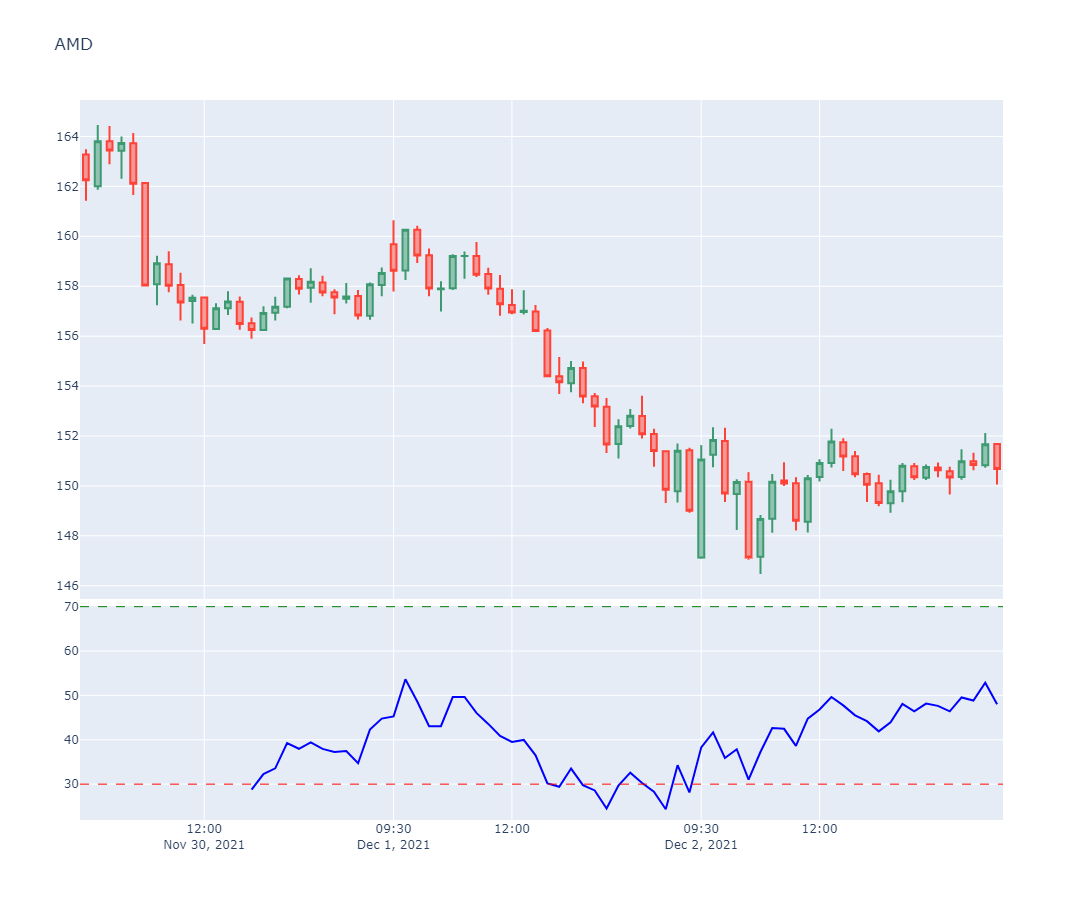

In [6]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.01,
                   row_heights=[0.7, 0.3])

candle = go.Candlestick(x=amd_df.index, open=amd_df['Open'],
                       high=amd_df['High'], low=amd_df['Low'],
                       close=amd_df['Close'], name='Candlestick')

rsi = go.Scatter(x=amd_df.index, y=amd_df['RSI'], 
                 line=dict(color='blue', width=2))

fig.add_trace(candle, row=1, col=1)  
fig.add_trace(rsi, row=2, col=1) 

# Draw 20 and 80 lines
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="red", row=2, col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="green", row=2, col=1)

# Add title
fig.update_layout(title="AMD")

# Get rid of empty dates and market closed
fig.update_layout(height=900, width=1200, 
                  showlegend=False, 
                  xaxis_rangeslider_visible=False,
                  xaxis_rangebreaks=[
            dict(bounds=["sat", "mon"]),
            dict(bounds=[16, 9.5], pattern="hour"), 
            dict(values=["2021-12-25", "2022-01-01"])
        ])
                                            
fig.show()

## Bollinger Bands

Bollinger Bands plot 2 lines using a moving average and the standard deviation defines how far apart the lines are. They also are used to define if prices are to high or low. When bands tighten it is believed a sharp price move in some direction. Prices tend to bounce off of the bands which provides potential market actions. 

A strong trend should be noted if the price moves outside the band. If prices go over the resistance line it is in overbought territory and if it breaks through support it is a sign of an oversold position.

You normally use 20 sessions when using them. 
 - High Band (Resistance) = Simple Moving Average + 2 * Standard Deviation
 - Low Band (Support) = Simple Moving Average - 2 * Standard Deviation

[*********************100%***********************]  1 of 1 completed


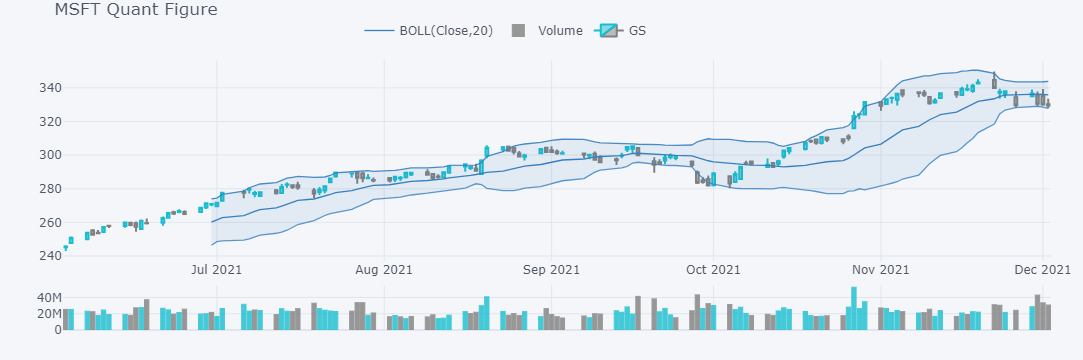

In [10]:
# Use Cufflinks QuantFigure Module to create Bollinger Bands
# add_sma - Simple Moving Average
# add_ema() - Exponential Moving Average
# add_trendline() - Trend line
# add_support() - Support line
# add_rsi - Relative Strength Indicator
# add_adx - Average Directional Index
# add_atr() - Average True Range
# add_macd() - Moving Average Convergence Divergence
# add_bollinger_bands - Bollinger Bands
# add_volume - Volume bars
# add_cci() - Commodity Channel Indicator
# add_dmi() - Directional Movement Index
# add_ptps() - Parabolic SAR
# add_resistance() - Resistance line
msft_df = yf.download(tickers="MSFT", period="6mo", interval='1d')
msft_df

qf=cf.QuantFig(msft_df, title='MSFT Quant Figure',legend='top',name='GS')
qf.add_bollinger_bands()
qf.add_volume()

qf.iplot()

## Hand Code Bollinger Bands

In [15]:
# Get rolling mean
msft_df['Mean'] = msft_df['Close'].rolling(window=20).mean()
msft_df

,Open,High,Low,Close,Adj Close,Volume,SD,Mean
Date,,,,,,,,
2021-06-03,245.220001,246.339996,243.000000,245.710007,244.792679,25307700,NaN,NaN
2021-06-04,247.759995,251.649994,247.509995,250.789993,249.853699,25281100,NaN,NaN
2021-06-07,249.979996,254.089996,249.809998,253.809998,252.862411,23079200,NaN,NaN
2021-06-08,255.160004,256.010010,252.509995,252.570007,251.627060,22455000,NaN,NaN
2021-06-09,253.809998,255.529999,253.210007,253.589996,252.643234,17937600,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-11-26,334.350006,337.929993,328.119995,329.679993,329.679993,24217200,3.825542,335.884497
2021-11-29,334.940002,339.029999,334.739990,336.630005,336.630005,28563500,3.693347,336.134998
2021-11-30,335.320007,337.779999,328.989990,330.589996,330.589996,42885600,3.584196,336.195998


In [16]:
# Get rolling standard deviation
msft_df['SD'] = msft_df['Close'].rolling(window=20).std()
msft_df

,Open,High,Low,Close,Adj Close,Volume,SD,Mean
Date,,,,,,,,
2021-06-03,245.220001,246.339996,243.000000,245.710007,244.792679,25307700,NaN,NaN
2021-06-04,247.759995,251.649994,247.509995,250.789993,249.853699,25281100,NaN,NaN
2021-06-07,249.979996,254.089996,249.809998,253.809998,252.862411,23079200,NaN,NaN
2021-06-08,255.160004,256.010010,252.509995,252.570007,251.627060,22455000,NaN,NaN
2021-06-09,253.809998,255.529999,253.210007,253.589996,252.643234,17937600,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-11-26,334.350006,337.929993,328.119995,329.679993,329.679993,24217200,3.825542,335.884497
2021-11-29,334.940002,339.029999,334.739990,336.630005,336.630005,28563500,3.693347,336.134998
2021-11-30,335.320007,337.779999,328.989990,330.589996,330.589996,42885600,3.584196,336.195998


In [17]:
msft_df['BB_Hi'] = msft_df['Mean'] + (2 * msft_df['SD'])
msft_df['BB_Low'] = msft_df['Mean'] - (2 * msft_df['SD'])
msft_df

,Open,High,Low,Close,Adj Close,Volume,SD,Mean,BB_Hi,BB_Low
Date,,,,,,,,,,
2021-06-03,245.220001,246.339996,243.000000,245.710007,244.792679,25307700,NaN,NaN,NaN,NaN
2021-06-04,247.759995,251.649994,247.509995,250.789993,249.853699,25281100,NaN,NaN,NaN,NaN
2021-06-07,249.979996,254.089996,249.809998,253.809998,252.862411,23079200,NaN,NaN,NaN,NaN
2021-06-08,255.160004,256.010010,252.509995,252.570007,251.627060,22455000,NaN,NaN,NaN,NaN
2021-06-09,253.809998,255.529999,253.210007,253.589996,252.643234,17937600,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-11-26,334.350006,337.929993,328.119995,329.679993,329.679993,24217200,3.825542,335.884497,343.535580,328.233414
2021-11-29,334.940002,339.029999,334.739990,336.630005,336.630005,28563500,3.693347,336.134998,343.521691,328.748304
2021-11-30,335.320007,337.779999,328.989990,330.589996,330.589996,42885600,3.584196,336.195998,343.364390,329.027605


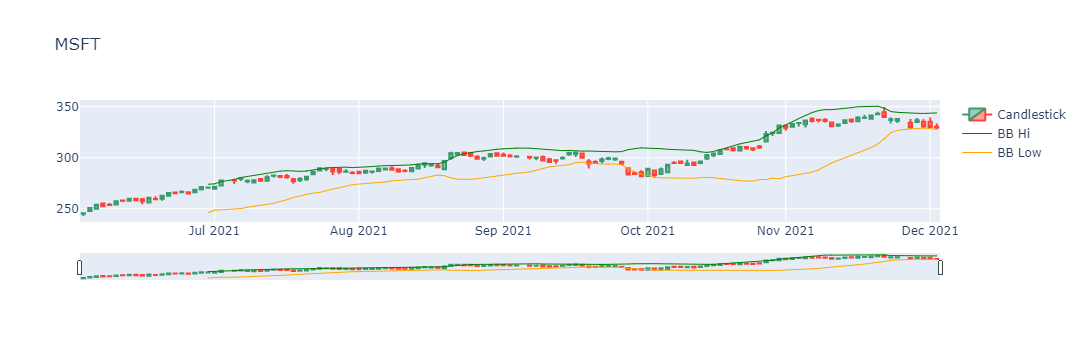

In [18]:
fig = go.Figure()

# Define candlestick and moving average lines
candle = go.Candlestick(x=msft_df.index, open=msft_df['Open'],
                       high=msft_df['High'], low=msft_df['Low'],
                       close=msft_df['Close'], name='Candlestick')
bb_hi = go.Scatter(x=msft_df.index, y=msft_df['BB_Hi'], 
                   line=dict(color='green', width=1), name="BB Hi")

bb_low = go.Scatter(x=msft_df.index, y=msft_df['BB_Low'], 
                  line=dict(color='orange', width=1), name="BB Low")

# Add plots to the figure
fig.add_trace(candle)
fig.add_trace(bb_hi)
fig.add_trace(bb_low)      

# Add title
fig.update_layout(title="MSFT")

# Get rid of empty dates on the weekend
fig.update_xaxes(rangebreaks=[dict(bounds=["sat", "mon"])])
                                            
fig.show()